In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from read_emg import *
from build_CNN import *
from sensor_shift import *

plt.style.use('seaborn-bright')
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.labelsize'] = 16
pd.options.display.float_format = "{:,.3f}".format

In [2]:
df = pd.read_pickle('DataCollection.pkl')
df['Trial_num'] = df['Trial_num'].astype(int)
Gesture_list = ['Cylinder Grasp', 'Wrist Extension', 'Fist', 'Finger mass extension', 'Opposition', 'Lateral Pinch']

# Between user rotation alignment using 1 calibration gestures¶
Some subjects wore the sensor upside down or wore the sensor using other hand. We have 4 possibilities listed in the matrix below:

<img src="sensor-orientation-matrix.png">

This matrix will be used to decide whether our correlation algorithm makes the right decision

#### Reference subject and session
* Subject 0100; Right hand; Sesion1 non-flipped

#### Subject profiles checked by video recorded during gesture (Subject; hand used; sensor orientation)
* Subject 0100; Right hand; Session1 non-flipped, session2 flipped

* Subject 0001; Right hand; Session1 non-flipped, session2 non-flipped

* Subject 1001; Right hand; Session1 flipped, session2 flipped

* Subject 1002; Left hand; Session1 flipped, session2 flipped

* Subject 1003; Left hand; Session1 flipped, session2 flipped

* Subject 1004; Right hand; Session1 flipped, session2 flipped

* Subject 1005; Right hand; Session1 non-flipped, session1 non-flipped

* Subject 1006; Left hand; Session1 non-flipped, session2 non-flipped

* Subject 1007; Right hand; Session1 non-flipped, session2 non-flipped

* Subject 1008; Left hand; Session1 flipped, session2 non-flipped

* Subject 1111; Right hand; Session1 flipped, session2 flipped

* Subject 1234; Right hand; Session1 flipped, session2 flipped

* Subject 9999; Right hand; Session1 non-flipped, session2 non-flipped

* Subject 9998; Right hand; Session1 non-flipped, session2 flipped

* Subject 0009; Right hand; Session1 non-flipped, session2 non-flipped

* Subject 0010; Right hand; Session1 non-flipped, session2 non-flipped

* Subject 0011; Right hand; Session1 non-flipped, session2 non-flipped

* Subject 0012; Right hand; Session1 non-flipped, session2 non-flipped

========Rotation alignment between users===========
Subject and session to reference: 0100_S1
Subject and session to rotate: 0100_S1
Flipping needed? False, shift 0

Subject and session to reference: 0100_S1
Subject and session to rotate: 0100_S2
Flipping needed? True, shift 1

========Rotation alignment between users===========
Subject and session to reference: 0100_S1
Subject and session to rotate: 0001_S1
Flipping needed? True, shift 1

Subject and session to reference: 0100_S1
Subject and session to rotate: 0001_S2
Flipping needed? False, shift 0

========Rotation alignment between users===========
Subject and session to reference: 0100_S1
Subject and session to rotate: 1001_S1
Flipping needed? False, shift 0

Subject and session to reference: 0100_S1
Subject and session to rotate: 1001_S2
Flipping needed? False, shift 0

========Rotation alignment between users===========
Subject and session to reference: 0100_S1
Subject and session to rotate: 1002_S1
Flipping needed? True, shift 

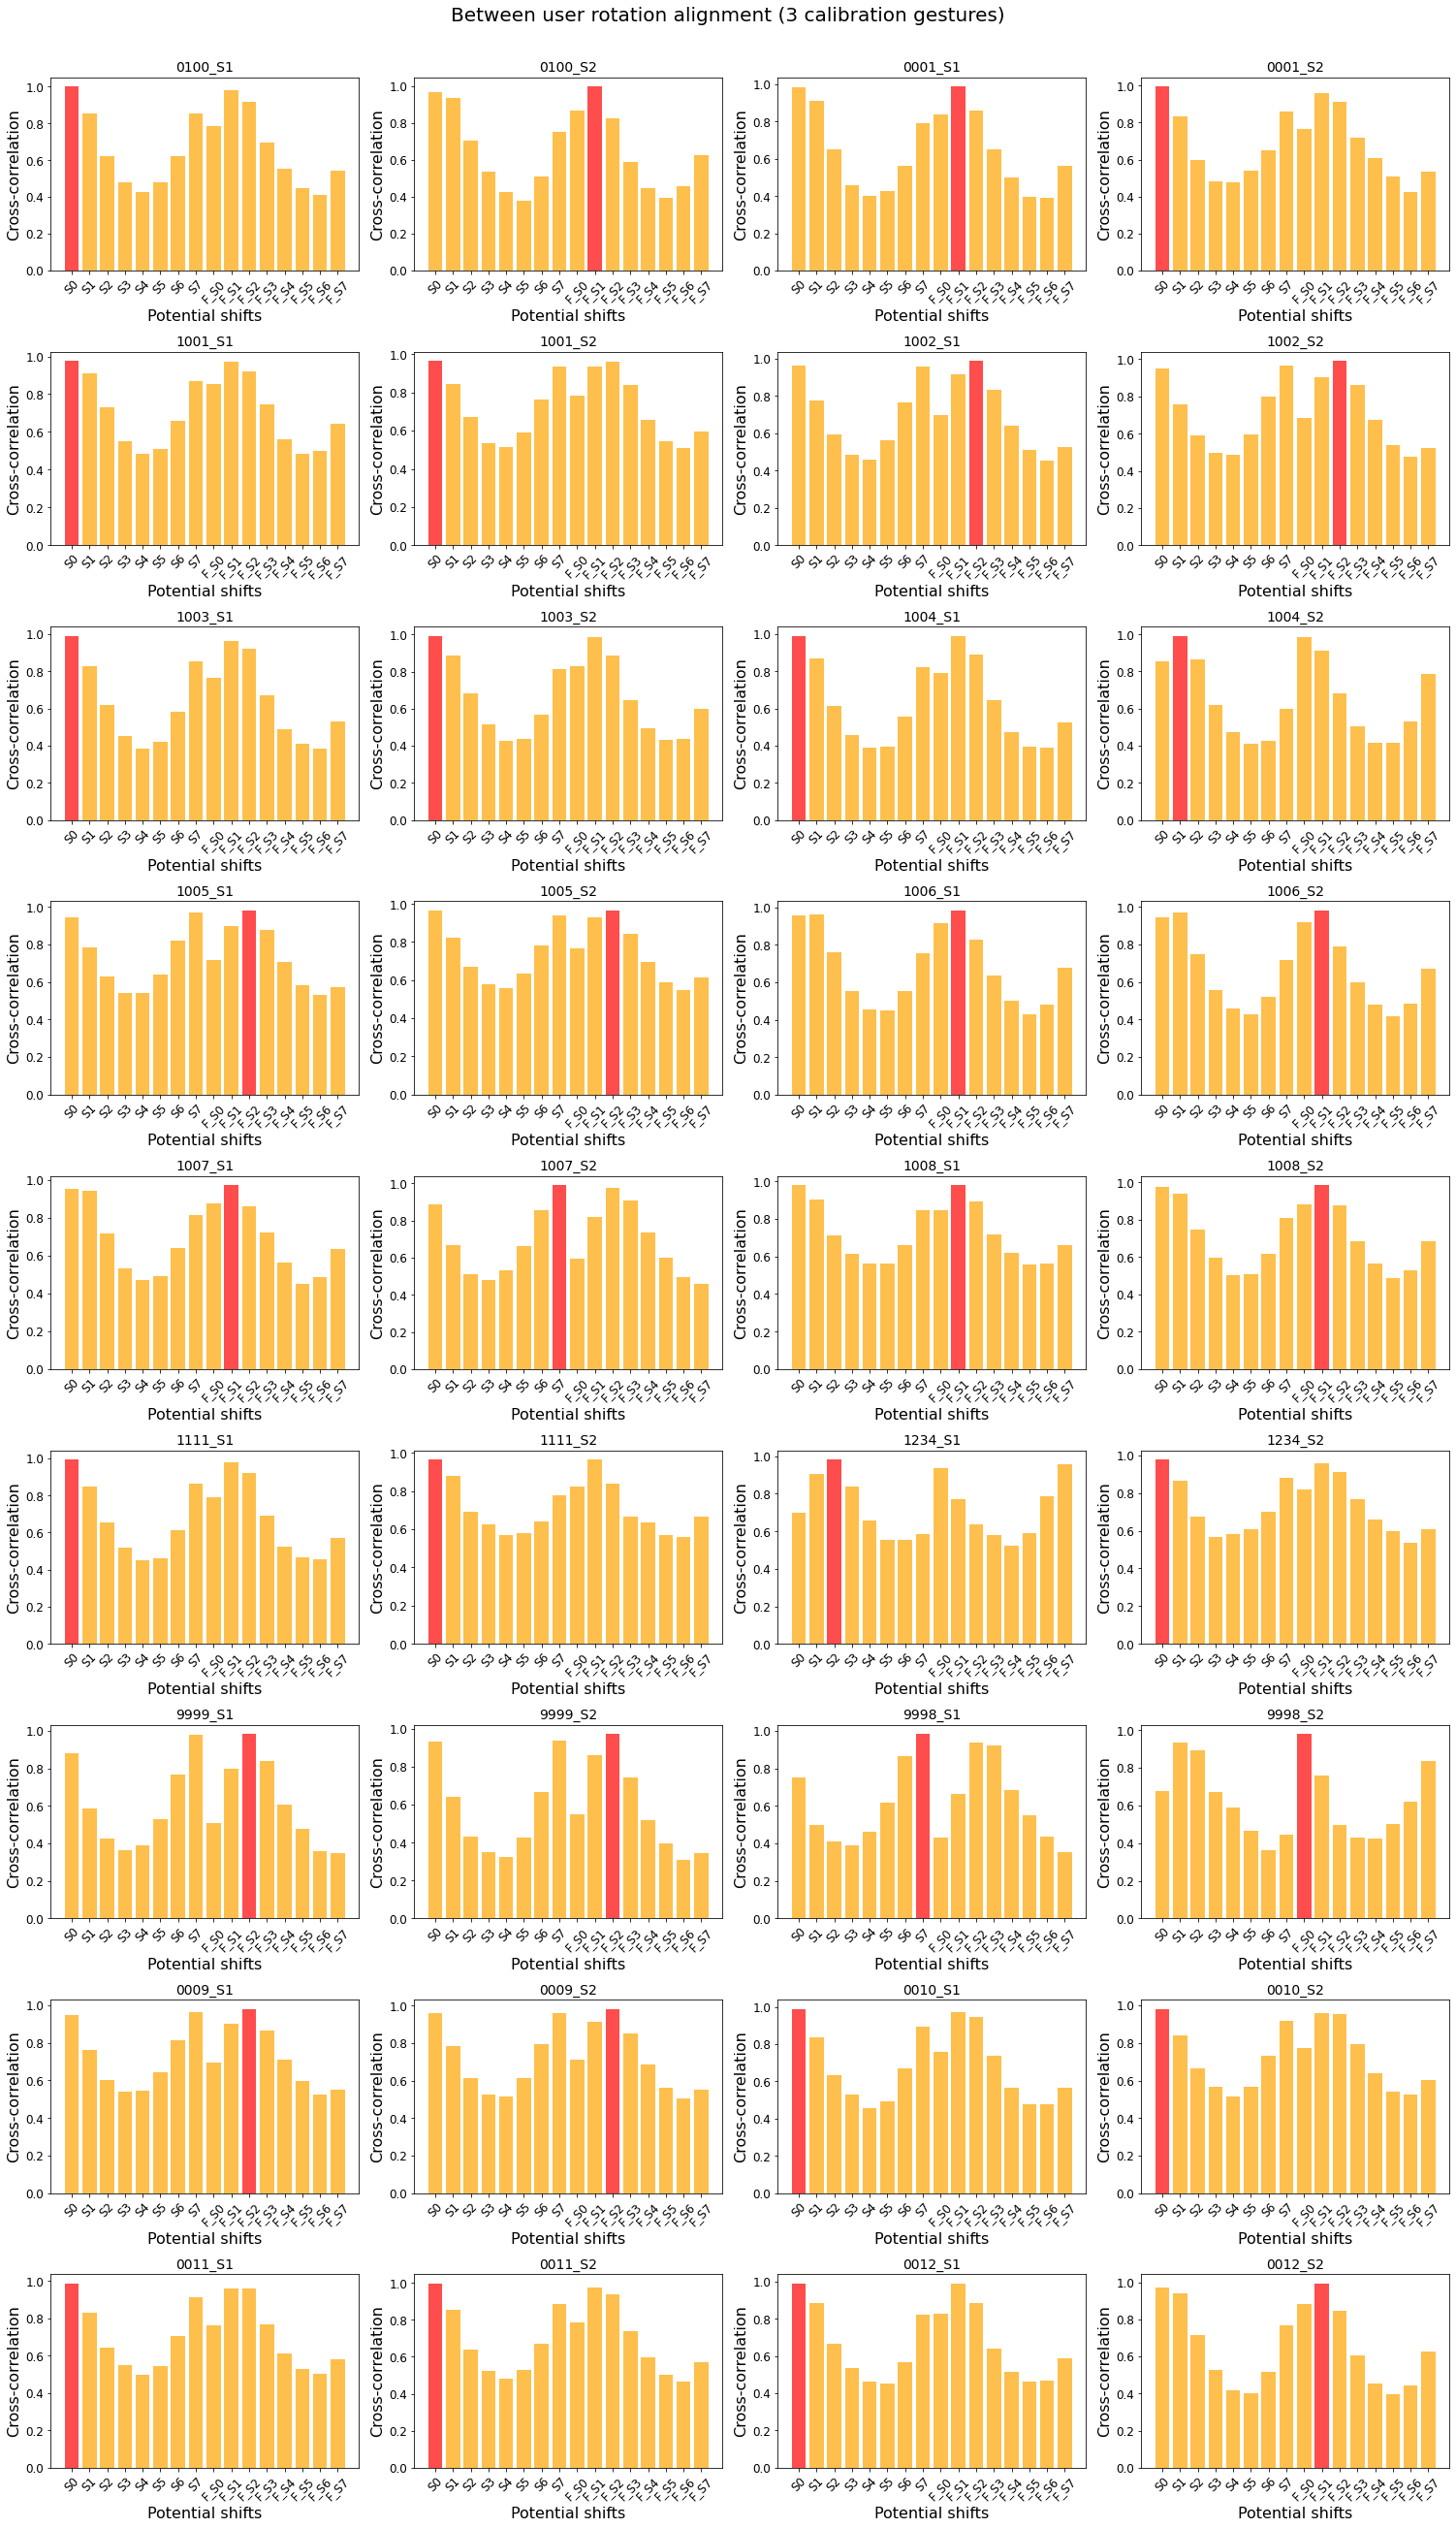

In [24]:
%%time
fig, ax = plt.subplots(9, 4, figsize = (21 , 16* (9/4)))
fig.suptitle('Between user rotation alignment (3 calibration gestures)', fontsize = 20, y = 1.005)
R = 0 
Col = 0

subject_list = ['0100', '0001', '1001', '1002', '1003', '1004', '1005', 
                '1006', '1007', '1008', '1111', '1234', '9999', '9998', 
                '0009', '0010', '0011', '0012']

session_reference = 'S1'
subject_reference = '0100'
session_list = ['S1', 'S2']

for subject_to_rotate in subject_list[:]:  
            
    print('===================================================')
    print('========Rotation alignment between users===========')
    print('===================================================')

    for session_to_rotate in session_list:
        print(f'Subject and session to reference: {subject_reference}_{session_reference}')
        print(f'Subject and session to rotate: {subject_to_rotate}_{session_to_rotate}')                   
        flipped_train, shift_train = CC_to_shift(df, 
                                                subject_reference = subject_reference, 
                                                subject_to_rotate = subject_to_rotate, 
                                                calibration_gesture_list = ['8'], 
                                                session_reference = session_reference, 
                                                session_to_rotate = session_to_rotate, ax = ax[R, Col])
        
        ax[R, Col].xaxis.set_tick_params(labelsize=12)
        ax[R, Col].yaxis.set_tick_params(labelsize=12)
        ax[R, Col].set_title(f'{subject_to_rotate}_{session_to_rotate}', fontsize = 14)
        Col += 1
        if Col == 4:
            Col = 0
            R += 1
    
        print(f'Flipping needed? {flipped_train}, shift {shift_train}\n')
plt.tight_layout(pad = 1.20)

# Errors made in orientation using only 1 gesture:
Note: Rotation shifts can not be checked because we don't have the ground truth
#### Wrist and finger extension

* 0001_S1, 1001_S1, 1001_S2, 1002_S1, 1002_S2, 1004_S1, 1004_S2, 1005_S1, 1005_S2, 1007_S1, 1008_S1, 1111_S1, 1111_S2, 1234_S1, 1234_S2, 9999_S1, 9999_S2, 0009_S1, 0009_S2, 0012_S2

# Between user rotation alignment using 3 calibration gestures
#### Wrist and finger extension, fist and wrist extension

========Rotation alignment between users===========
Subject and session to reference: 0100_S1
Subject and session to rotate: 0100_S1
Flipping needed? False, shift 0

Subject and session to reference: 0100_S1
Subject and session to rotate: 0100_S2
Flipping needed? True, shift 1

========Rotation alignment between users===========
Subject and session to reference: 0100_S1
Subject and session to rotate: 0001_S1
Flipping needed? False, shift 0

Subject and session to reference: 0100_S1
Subject and session to rotate: 0001_S2
Flipping needed? False, shift 0

========Rotation alignment between users===========
Subject and session to reference: 0100_S1
Subject and session to rotate: 1001_S1
Flipping needed? True, shift 1

Subject and session to reference: 0100_S1
Subject and session to rotate: 1001_S2
Flipping needed? True, shift 2

========Rotation alignment between users===========
Subject and session to reference: 0100_S1
Subject and session to rotate: 1002_S1
Flipping needed? False, shift 

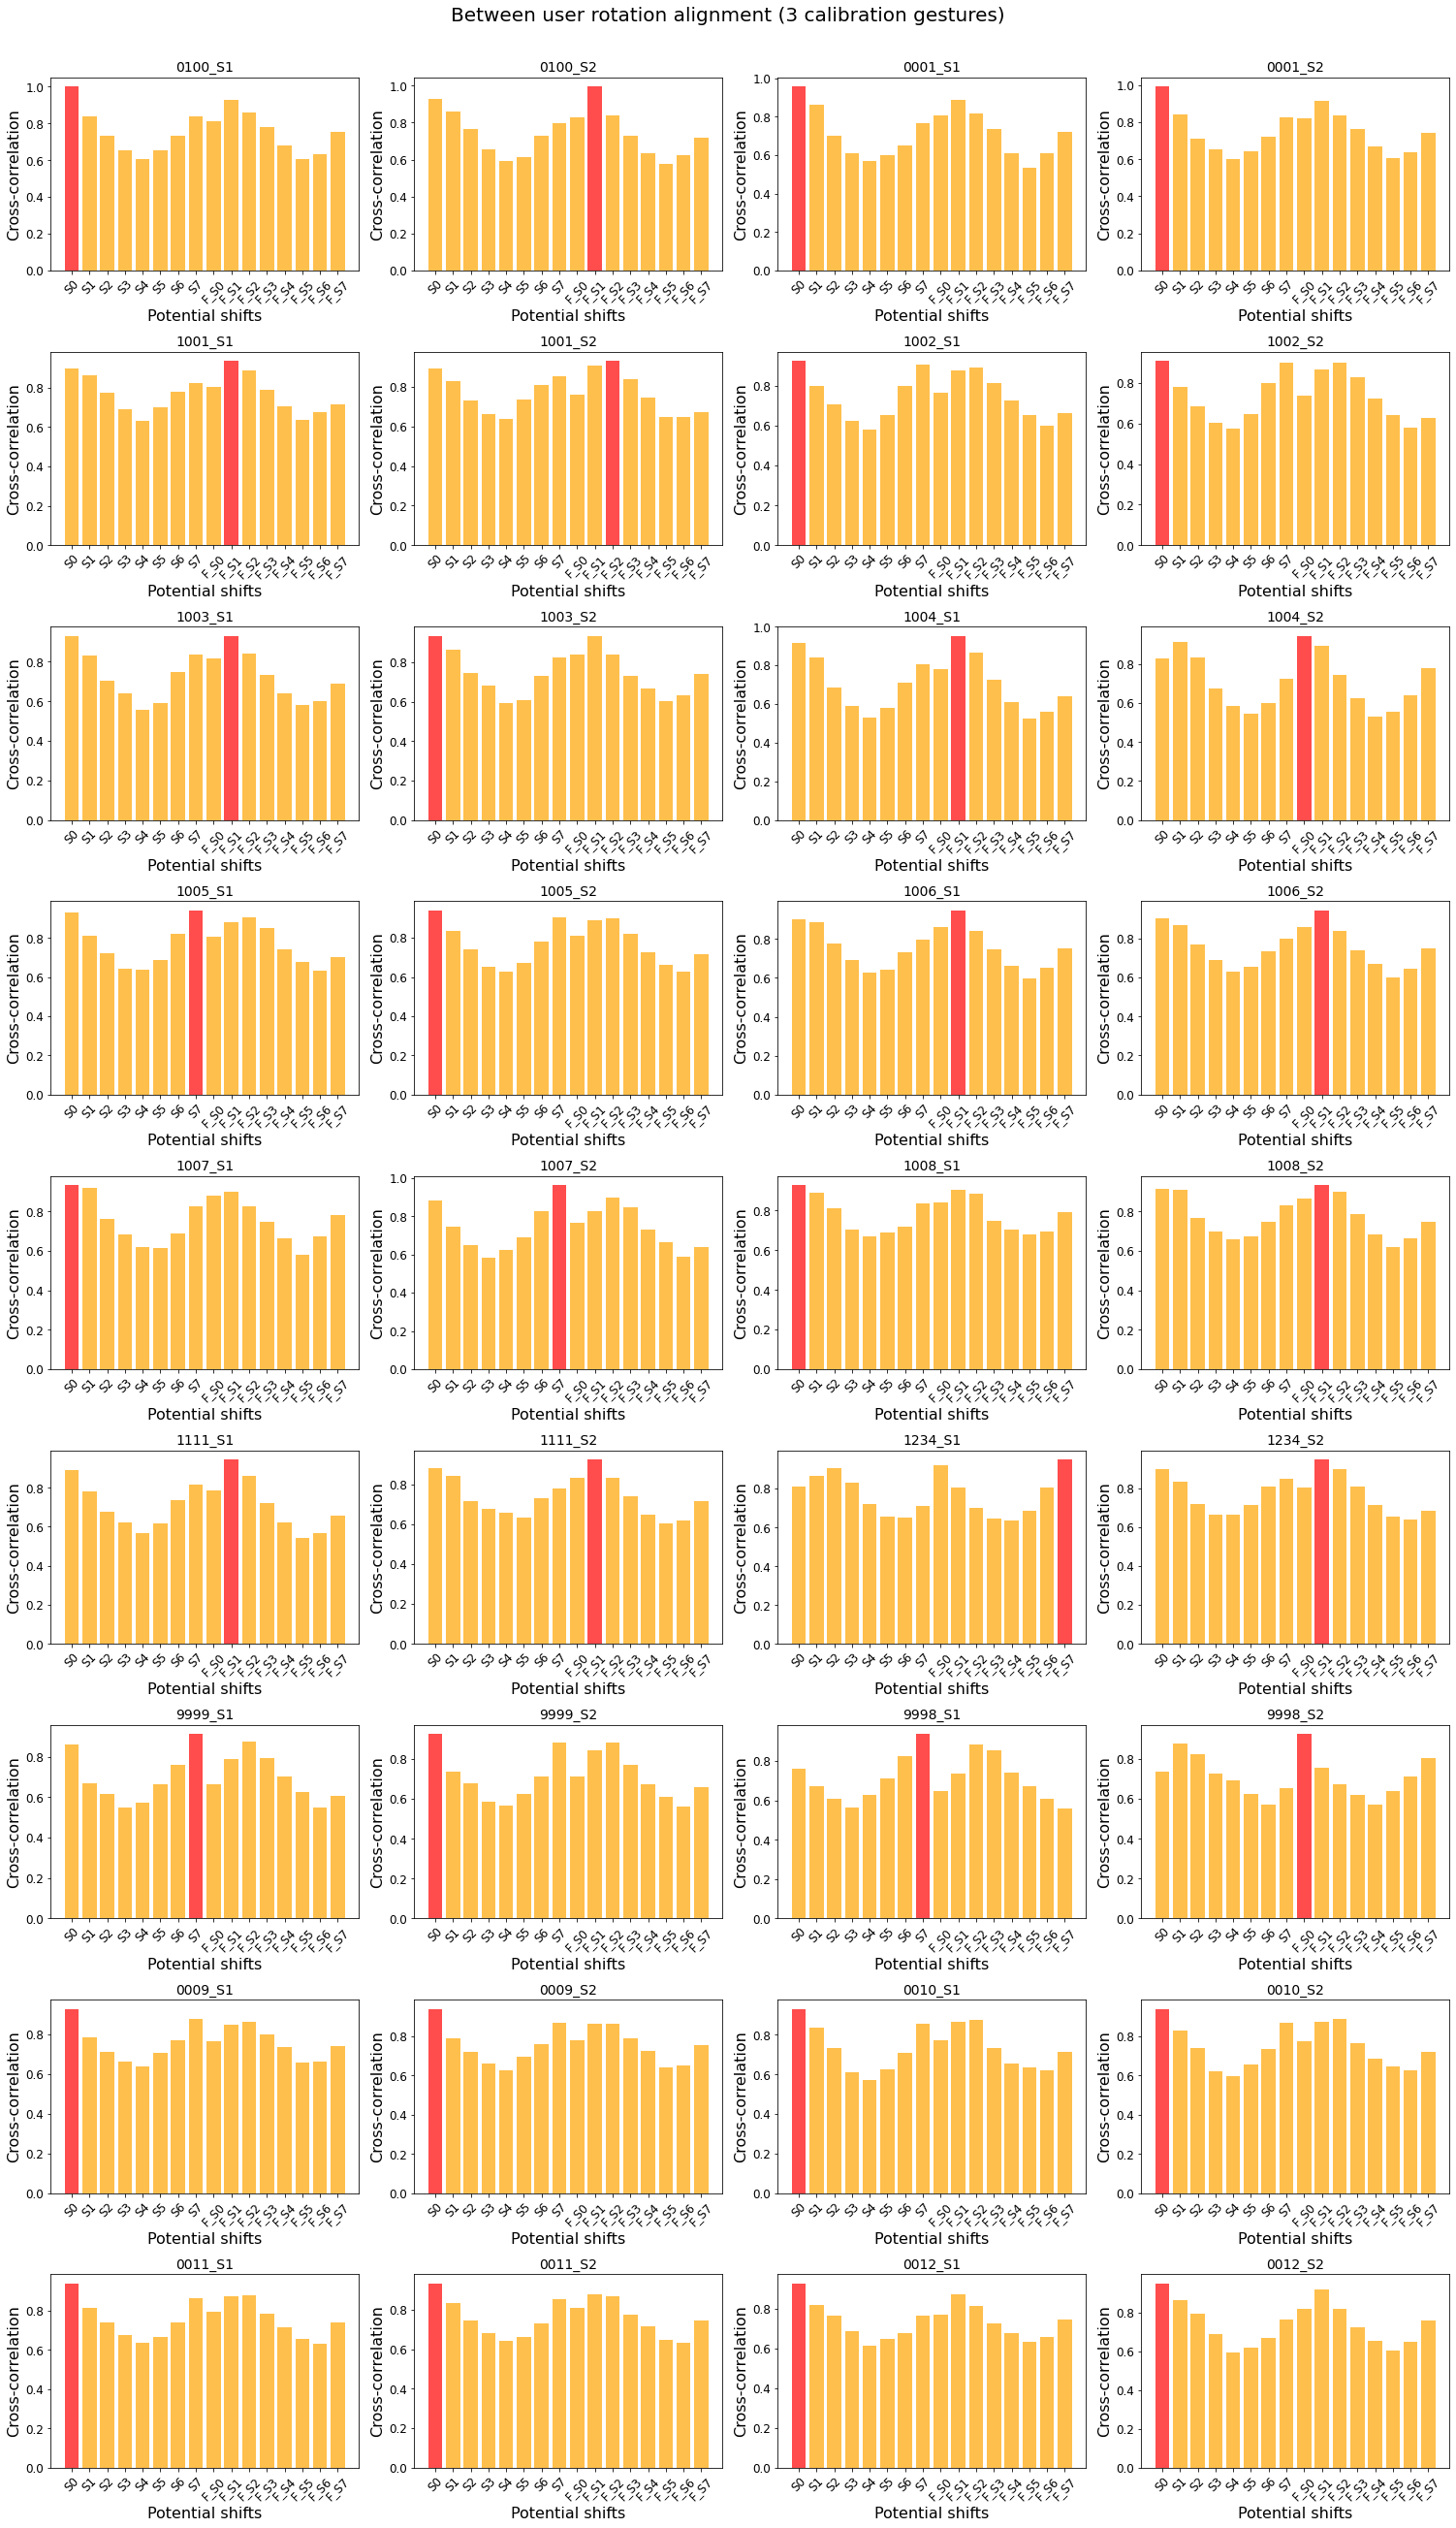

In [23]:
%%time
fig, ax = plt.subplots(9, 4, figsize = (21 , 16* (9/4)))
fig.suptitle('Between user rotation alignment (3 calibration gestures)', fontsize = 20, y = 1.005)
R = 0 
Col = 0

subject_list = ['0100', '0001', '1001', '1002', '1003', '1004', '1005', 
                '1006', '1007', '1008', '1111', '1234', '9999', '9998', 
                '0009', '0010', '0011', '0012']

session_reference = 'S1'
subject_reference = '0100'
session_list = ['S1', 'S2']

for subject_to_rotate in subject_list[:]:  
            
    print('===================================================')
    print('========Rotation alignment between users===========')
    print('===================================================')

    for session_to_rotate in session_list:
        print(f'Subject and session to reference: {subject_reference}_{session_reference}')
        print(f'Subject and session to rotate: {subject_to_rotate}_{session_to_rotate}')                   
        flipped_train, shift_train = CC_to_shift(df, 
                                                subject_reference = subject_reference, 
                                                subject_to_rotate = subject_to_rotate, 
                                                calibration_gesture_list = ['8', '4', '5'], 
                                                session_reference = session_reference, 
                                                session_to_rotate = session_to_rotate, ax = ax[R, Col])
        
        ax[R, Col].xaxis.set_tick_params(labelsize=12)
        ax[R, Col].yaxis.set_tick_params(labelsize=12)
        ax[R, Col].set_title(f'{subject_to_rotate}_{session_to_rotate}', fontsize = 14)
        Col += 1
        if Col == 4:
            Col = 0
            R += 1
    

        print(f'Flipping needed? {flipped_train}, shift {shift_train}\n')
plt.tight_layout(pad = 1.20)

# Errors made in orientation:
(Rotation shifts can not be checked because we don't have the ground truth)

* 1003_S1